source: <br>
https://umap-learn.readthedocs.io/en/latest/auto_examples/mnist_transform_new_data.html#sphx-glr-auto-examples-mnist-transform-new-data-py

modified by: <br>
[morkapronczay](https://github.com/morkapronczay)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import altair as alt

import umap
sns.set(context="paper", style="white")

# Data

## Create

In [2]:
mnist = fetch_openml("mnist_784", version=1)
sample_size = 5000

X_train, X_test, y_train, y_test = train_test_split(
    mnist.data[:sample_size], mnist.target[:sample_size], stratify=mnist.target[:sample_size], random_state=42
)

## Check data

In [3]:
X_train.shape

(3750, 784)

In [4]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train.iloc[100].values[:200]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

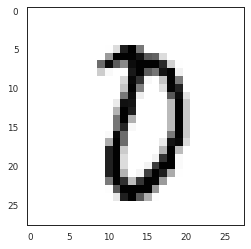

In [6]:
plt.imshow(X_train.iloc[100].values.reshape(28, 28), cmap='Greys',  interpolation='nearest')

In [7]:
y_train.head()

3659    2
1404    8
1323    6
2264    4
4740    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

# UMAP

In [8]:
reducer = umap.UMAP(random_state=42, n_neighbors=15, n_components=2, metric='euclidean')
embedding_train = reducer.fit_transform(X_train)
embedding_test = reducer.transform(X_test)

# Visualize

In [9]:
source_train = pd.DataFrame(embedding_train, columns=['x', 'y'])
source_train['color'] = y_train.reset_index()['class'].astype(int)
source_test = pd.DataFrame(embedding_test, columns=['x', 'y'])
source_test['color'] = y_test.reset_index()['class'].astype(int)

In [10]:
source_train.head()

,x,y,color
0,5.363163,10.505287,2
1,1.683668,7.778890,8
2,1.036754,7.838448,6
3,12.111501,2.072442,4
4,4.815359,7.608927,3


## matplotlib

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


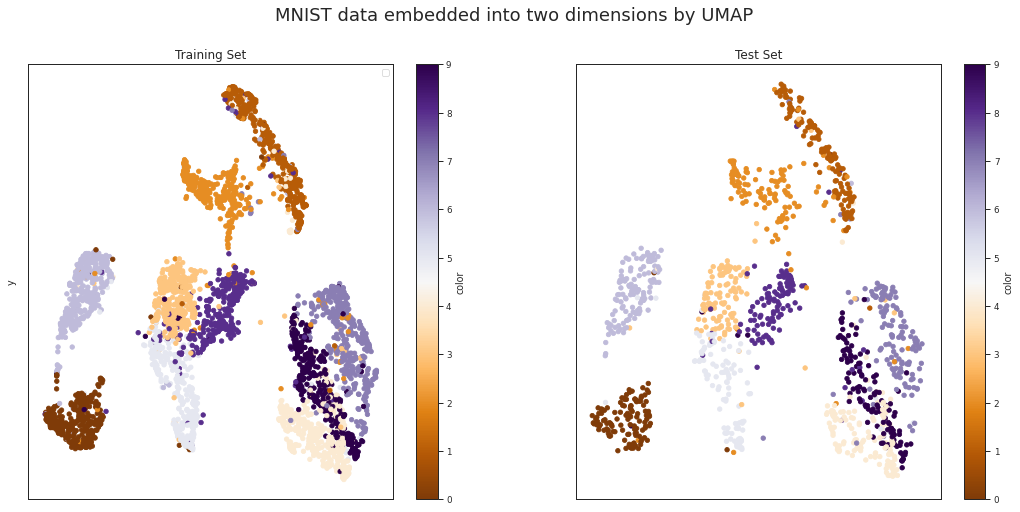

In [11]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 8))
source_train.plot.scatter(x='x', y='y', c='color', ax=ax[0], cmap='PuOr')
source_test.plot.scatter(x='x', y='y', c='color', ax=ax[1], cmap='PuOr')
plt.suptitle("MNIST data embedded into two dimensions by UMAP", fontsize=18)
plt.setp(ax[0], xticks=[], yticks=[])
plt.setp(ax[1], xticks=[], yticks=[])
ax[0].set_title("Training Set", fontsize=12)
ax[0].legend()
ax[1].set_title("Test Set", fontsize=12)
plt.show()

## altair

In [15]:
domain = [0, 1, 2, 3, 4, 5, 6, 7,8, 9]
range_ = ['yellow', 'orange', 'red', 'pink', 'purple', 'lightblue', 'darkblue','darkgreen', 'lightgreen', 'khaki']
brush = alt.selection(type='interval')

alt.Chart(source_train).mark_circle(size=20).encode(
    x='x:Q',
    y='y:Q',
    color=alt.condition(brush, alt.Color('color:N', scale=alt.Scale(domain=domain, range=range_, type=alt.ScaleType('ordinal'))), alt.value('grey')),
    tooltip=['color']
).properties(width=400, height=400, title='MNIST train set UMAP encoded'
).add_selection(brush) | alt.Chart(
    source_test).mark_circle(size=20).encode(
    x='x',
    y='y',
    color=alt.condition(brush, alt.Color('color:N', scale=alt.Scale(domain=domain, range=range_, type=alt.ScaleType('ordinal'))), alt.value('grey')),
    tooltip=['color']
).properties(width=400, height=400, title='MNIST test set UMAP encoded'
).add_selection(brush)

alt.HConcatChart(...)

In [16]:
def get_altair_chart(df, train=True, brush=brush):
    if train:
        title = 'MNIST train set UMAP encoded'
    else:
        title = 'MNIST test set UMAP encoded'
    return alt.Chart(df).mark_circle(size=20).encode(
        x='x:Q',
        y='y:Q',
        color=alt.condition(brush, alt.Color('color:N', scale=alt.Scale(domain=domain, range=range_, type=alt.ScaleType('ordinal'))), alt.value('grey')),
        tooltip=['color']
    ).properties(width=400, height=400, title=title
    ).add_selection(brush)
    

In [17]:
get_altair_chart(source_train, True) | get_altair_chart(source_test, False)

alt.HConcatChart(...)